In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
from tqdm import tqdm
import matplotlib.pyplot as plt

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define data transforms
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Define the directory path
data_dir = r"D:\archive (1)\PlantVillage"

# Load the entire dataset
full_dataset = datasets.ImageFolder(root=data_dir, transform=transform)

# Define the sizes of each split
train_size = int(0.8 * len(full_dataset))
val_size = int(0.1 * len(full_dataset))
test_size = len(full_dataset) - train_size - val_size

# Split the dataset into training, validation, and testing sets
train_dataset, val_dataset, test_dataset = random_split(full_dataset, [train_size, val_size, test_size])

# Create data loaders for each set
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False, num_workers=4, pin_memory=True)

# Print class names
print(full_dataset.classes)

# Custom VGG-like model definition
class CustomVGG(nn.Module):
    def __init__(self, num_classes=15):
        super(CustomVGG, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(512 * 2 * 2, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

# Print the model architecture
model = CustomVGG(num_classes=15).to(device)
print(model)



['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']
CustomVGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, di


Training with learning rate: 0.001


Epoch [1/50], Train Loss: 5.3525, Train Accuracy: 0.1406, Val Loss: 2.5781, Val Accuracy: 0.0868


Epoch [2/50], Train Loss: 2.4008, Train Accuracy: 0.1879, Val Loss: 2.1565, Val Accuracy: 0.2375


Epoch [3/50], Train Loss: 2.0180, Train Accuracy: 0.2766, Val Loss: 1.8161, Val Accuracy: 0.3204


Epoch [4/50], Train Loss: 1.5946, Train Accuracy: 0.4448, Val Loss: 1.5609, Val Accuracy: 0.4823


Epoch [5/50], Train Loss: 1.3137, Train Accuracy: 0.5555, Val Loss: 1.2978, Val Accuracy: 0.5744


Epoch [6/50], Train Loss: 1.1630, Train Accuracy: 0.6088, Val Loss: 1.1034, Val Accuracy: 0.6389


Epoch [7/50], Train Loss: 0.9341, Train Accuracy: 0.6818, Val Loss: 0.8698, Val Accuracy: 0.7038


Epoch [8/50], Train Loss: 0.8148, Train Accuracy: 0.7274, Val Loss: 0.7593, Val Accuracy: 0.7470


Epoch [9/50], Train Loss: 0.6984, Train Accuracy: 0.7713, Val Loss: 0.6722, Val Accuracy: 0.7794


Epoch [10/50], Train Loss: 0.5718, Train Accuracy: 0.8111, Val Loss: 0.5085, Val Accuracy: 0.8303


Epoch [11/50], Train Loss: 0.4604, Train Accuracy: 0.8478, Val Loss: 0.4673, Val Accuracy: 0.8507


Epoch [12/50], Train Loss: 0.4004, Train Accuracy: 0.8698, Val Loss: 0.4142, Val Accuracy: 0.8638


Epoch [13/50], Train Loss: 0.3557, Train Accuracy: 0.8851, Val Loss: 0.3815, Val Accuracy: 0.8672


Epoch [14/50], Train Loss: 0.3323, Train Accuracy: 0.8933, Val Loss: 0.4006, Val Accuracy: 0.8740


Epoch [15/50], Train Loss: 0.3115, Train Accuracy: 0.9018, Val Loss: 0.3570, Val Accuracy: 0.8856


Epoch [16/50], Train Loss: 0.2543, Train Accuracy: 0.9201, Val Loss: 0.3057, Val Accuracy: 0.9055


Epoch [17/50], Train Loss: 0.2324, Train Accuracy: 0.9261, Val Loss: 0.3441, Val Accuracy: 0.8924


Epoch [18/50], Train Loss: 0.2212, Train Accuracy: 0.9288, Val Loss: 0.2989, Val Accuracy: 0.9161


Epoch [19/50], Train Loss: 0.2064, Train Accuracy: 0.9373, Val Loss: 0.2901, Val Accuracy: 0.9094


Epoch [20/50], Train Loss: 0.1833, Train Accuracy: 0.9413, Val Loss: 0.2999, Val Accuracy: 0.9147


Epoch [21/50], Train Loss: 0.1739, Train Accuracy: 0.9446, Val Loss: 0.3750, Val Accuracy: 0.8972


Epoch [22/50], Train Loss: 0.1747, Train Accuracy: 0.9439, Val Loss: 0.3476, Val Accuracy: 0.9045


Epoch [23/50], Train Loss: 0.1491, Train Accuracy: 0.9542, Val Loss: 0.3815, Val Accuracy: 0.8924


Epoch [24/50], Train Loss: 0.1322, Train Accuracy: 0.9582, Val Loss: 0.3425, Val Accuracy: 0.8977


Epoch [25/50], Train Loss: 0.1514, Train Accuracy: 0.9531, Val Loss: 0.2970, Val Accuracy: 0.9186


Epoch [26/50], Train Loss: 0.1484, Train Accuracy: 0.9567, Val Loss: 0.2682, Val Accuracy: 0.9142


Epoch [27/50], Train Loss: 0.1306, Train Accuracy: 0.9595, Val Loss: 0.3431, Val Accuracy: 0.9069


Epoch [28/50], Train Loss: 0.1264, Train Accuracy: 0.9626, Val Loss: 0.2751, Val Accuracy: 0.9350


Epoch [29/50], Train Loss: 0.1060, Train Accuracy: 0.9681, Val Loss: 0.3057, Val Accuracy: 0.9181


Epoch [30/50], Train Loss: 0.0900, Train Accuracy: 0.9732, Val Loss: 0.2853, Val Accuracy: 0.9292


Epoch [31/50], Train Loss: 0.1205, Train Accuracy: 0.9621, Val Loss: 0.3753, Val Accuracy: 0.9060


Epoch [32/50], Train Loss: 0.1101, Train Accuracy: 0.9672, Val Loss: 0.2386, Val Accuracy: 0.9287


Epoch [33/50], Train Loss: 0.0917, Train Accuracy: 0.9722, Val Loss: 0.2494, Val Accuracy: 0.9292


Epoch [34/50], Train Loss: 0.1297, Train Accuracy: 0.9614, Val Loss: 0.3930, Val Accuracy: 0.9190


Epoch [35/50], Train Loss: 0.1108, Train Accuracy: 0.9675, Val Loss: 0.2714, Val Accuracy: 0.9346


Epoch [36/50], Train Loss: 0.1029, Train Accuracy: 0.9700, Val Loss: 0.3074, Val Accuracy: 0.9166


Epoch [37/50], Train Loss: 0.2313, Train Accuracy: 0.9358, Val Loss: 0.5775, Val Accuracy: 0.8231


Epoch [38/50], Train Loss: 0.2426, Train Accuracy: 0.9285, Val Loss: 0.3040, Val Accuracy: 0.9176


Epoch [39/50], Train Loss: 0.1013, Train Accuracy: 0.9696, Val Loss: 0.2890, Val Accuracy: 0.9312


Epoch [40/50], Train Loss: 0.1117, Train Accuracy: 0.9669, Val Loss: 0.2299, Val Accuracy: 0.9472


Epoch [41/50], Train Loss: 0.0774, Train Accuracy: 0.9767, Val Loss: 0.2995, Val Accuracy: 0.9292


Epoch [42/50], Train Loss: 0.0704, Train Accuracy: 0.9800, Val Loss: 0.3165, Val Accuracy: 0.9147


Epoch [43/50], Train Loss: 0.0834, Train Accuracy: 0.9758, Val Loss: 0.2780, Val Accuracy: 0.9137


Epoch [44/50], Train Loss: 0.0822, Train Accuracy: 0.9764, Val Loss: 0.3334, Val Accuracy: 0.9210


Epoch [45/50], Train Loss: 0.1016, Train Accuracy: 0.9726, Val Loss: 0.4360, Val Accuracy: 0.9084


Epoch [46/50], Train Loss: 0.0716, Train Accuracy: 0.9803, Val Loss: 0.3451, Val Accuracy: 0.9287


Epoch [47/50], Train Loss: 0.0754, Train Accuracy: 0.9786, Val Loss: 0.2639, Val Accuracy: 0.9346


Epoch [48/50], Train Loss: 0.0724, Train Accuracy: 0.9801, Val Loss: 0.4047, Val Accuracy: 0.9176


Epoch [49/50], Train Loss: 0.1697, Train Accuracy: 0.9582, Val Loss: 0.4479, Val Accuracy: 0.8769


Epoch [50/50], Train Loss: 0.1316, Train Accuracy: 0.9626, Val Loss: 0.2353, Val Accuracy: 0.9452
Test Loss: 0.1946, Test Accuracy: 0.9525

Training with learning rate: 0.0001


Epoch [1/50], Train Loss: 2.4224, Train Accuracy: 0.1798, Val Loss: 2.2031, Val Accuracy: 0.2370


Epoch [2/50], Train Loss: 2.1146, Train Accuracy: 0.2803, Val Loss: 1.9227, Val Accuracy: 0.3417


Epoch [3/50], Train Loss: 1.7642, Train Accuracy: 0.4213, Val Loss: 1.4787, Val Accuracy: 0.5298


Epoch [4/50], Train Loss: 1.2687, Train Accuracy: 0.5757, Val Loss: 1.0657, Val Accuracy: 0.6345


Epoch [5/50], Train Loss: 1.0008, Train Accuracy: 0.6620, Val Loss: 0.9835, Val Accuracy: 0.6699


Epoch [6/50], Train Loss: 0.8352, Train Accuracy: 0.7222, Val Loss: 0.7299, Val Accuracy: 0.7562


Epoch [7/50], Train Loss: 0.6790, Train Accuracy: 0.7718, Val Loss: 0.7678, Val Accuracy: 0.7620


Epoch [8/50], Train Loss: 0.6027, Train Accuracy: 0.8008, Val Loss: 0.6157, Val Accuracy: 0.7906


Epoch [9/50], Train Loss: 0.5039, Train Accuracy: 0.8331, Val Loss: 0.4083, Val Accuracy: 0.8677


Epoch [10/50], Train Loss: 0.3963, Train Accuracy: 0.8692, Val Loss: 0.4085, Val Accuracy: 0.8580


Epoch [11/50], Train Loss: 0.3456, Train Accuracy: 0.8837, Val Loss: 0.3477, Val Accuracy: 0.8812


Epoch [12/50], Train Loss: 0.2939, Train Accuracy: 0.9007, Val Loss: 0.3394, Val Accuracy: 0.8754


Epoch [13/50], Train Loss: 0.2705, Train Accuracy: 0.9093, Val Loss: 0.2814, Val Accuracy: 0.9006


Epoch [14/50], Train Loss: 0.2334, Train Accuracy: 0.9209, Val Loss: 0.2698, Val Accuracy: 0.9045


Epoch [15/50], Train Loss: 0.1949, Train Accuracy: 0.9337, Val Loss: 0.2381, Val Accuracy: 0.9239


Epoch [16/50], Train Loss: 0.1749, Train Accuracy: 0.9392, Val Loss: 0.2244, Val Accuracy: 0.9244


Epoch [17/50], Train Loss: 0.1470, Train Accuracy: 0.9507, Val Loss: 0.2658, Val Accuracy: 0.9186


Epoch [18/50], Train Loss: 0.1354, Train Accuracy: 0.9552, Val Loss: 0.2381, Val Accuracy: 0.9210


Epoch [19/50], Train Loss: 0.1449, Train Accuracy: 0.9523, Val Loss: 0.2697, Val Accuracy: 0.9094


Epoch [20/50], Train Loss: 0.1005, Train Accuracy: 0.9660, Val Loss: 0.2240, Val Accuracy: 0.9249


Epoch [21/50], Train Loss: 0.1162, Train Accuracy: 0.9612, Val Loss: 0.3059, Val Accuracy: 0.9098


Epoch [22/50], Train Loss: 0.0858, Train Accuracy: 0.9721, Val Loss: 0.2127, Val Accuracy: 0.9365


Epoch [23/50], Train Loss: 0.0784, Train Accuracy: 0.9737, Val Loss: 0.1823, Val Accuracy: 0.9447


Epoch [24/50], Train Loss: 0.0750, Train Accuracy: 0.9752, Val Loss: 0.2359, Val Accuracy: 0.9297


Epoch [25/50], Train Loss: 0.0687, Train Accuracy: 0.9782, Val Loss: 0.1910, Val Accuracy: 0.9428


Epoch [26/50], Train Loss: 0.0658, Train Accuracy: 0.9781, Val Loss: 0.2633, Val Accuracy: 0.9409


Epoch [27/50], Train Loss: 0.0340, Train Accuracy: 0.9887, Val Loss: 0.1918, Val Accuracy: 0.9510


Epoch [28/50], Train Loss: 0.0909, Train Accuracy: 0.9715, Val Loss: 0.1959, Val Accuracy: 0.9491


Epoch [29/50], Train Loss: 0.0679, Train Accuracy: 0.9787, Val Loss: 0.1668, Val Accuracy: 0.9481


Epoch [30/50], Train Loss: 0.0376, Train Accuracy: 0.9889, Val Loss: 0.2034, Val Accuracy: 0.9438


Epoch [31/50], Train Loss: 0.0341, Train Accuracy: 0.9885, Val Loss: 0.1662, Val Accuracy: 0.9540


Epoch [32/50], Train Loss: 0.0402, Train Accuracy: 0.9880, Val Loss: 0.1845, Val Accuracy: 0.9520


Epoch [33/50], Train Loss: 0.0194, Train Accuracy: 0.9941, Val Loss: 0.1713, Val Accuracy: 0.9520


Epoch [34/50], Train Loss: 0.0465, Train Accuracy: 0.9853, Val Loss: 0.1916, Val Accuracy: 0.9486


Epoch [35/50], Train Loss: 0.0349, Train Accuracy: 0.9890, Val Loss: 0.1962, Val Accuracy: 0.9413


Epoch [36/50], Train Loss: 0.0432, Train Accuracy: 0.9861, Val Loss: 0.1973, Val Accuracy: 0.9443


Epoch [37/50], Train Loss: 0.0320, Train Accuracy: 0.9901, Val Loss: 0.1975, Val Accuracy: 0.9457


Epoch [38/50], Train Loss: 0.0369, Train Accuracy: 0.9900, Val Loss: 0.3189, Val Accuracy: 0.9234


Epoch [39/50], Train Loss: 0.0313, Train Accuracy: 0.9899, Val Loss: 0.1776, Val Accuracy: 0.9525


Epoch [40/50], Train Loss: 0.0492, Train Accuracy: 0.9846, Val Loss: 0.1682, Val Accuracy: 0.9549


Epoch [41/50], Train Loss: 0.0400, Train Accuracy: 0.9878, Val Loss: 0.1814, Val Accuracy: 0.9549


Epoch [42/50], Train Loss: 0.0265, Train Accuracy: 0.9921, Val Loss: 0.2257, Val Accuracy: 0.9375


Epoch [43/50], Train Loss: 0.0398, Train Accuracy: 0.9883, Val Loss: 0.1747, Val Accuracy: 0.9617


Epoch [44/50], Train Loss: 0.0538, Train Accuracy: 0.9827, Val Loss: 0.1696, Val Accuracy: 0.9535


Epoch [45/50], Train Loss: 0.0212, Train Accuracy: 0.9933, Val Loss: 0.1454, Val Accuracy: 0.9612


Epoch [46/50], Train Loss: 0.0360, Train Accuracy: 0.9899, Val Loss: 0.1814, Val Accuracy: 0.9540


Epoch [47/50], Train Loss: 0.0273, Train Accuracy: 0.9908, Val Loss: 0.1837, Val Accuracy: 0.9462


Epoch [48/50], Train Loss: 0.0219, Train Accuracy: 0.9932, Val Loss: 0.1931, Val Accuracy: 0.9549


Epoch [49/50], Train Loss: 0.0446, Train Accuracy: 0.9876, Val Loss: 0.1967, Val Accuracy: 0.9447


Epoch [50/50], Train Loss: 0.0201, Train Accuracy: 0.9938, Val Loss: 0.1789, Val Accuracy: 0.9564
Test Loss: 0.2030, Test Accuracy: 0.9559

Training with learning rate: 1e-05


Epoch [1/50], Train Loss: 2.6172, Train Accuracy: 0.1558, Val Loss: 2.5379, Val Accuracy: 0.1522


Epoch [2/50], Train Loss: 2.4196, Train Accuracy: 0.1581, Val Loss: 2.3424, Val Accuracy: 0.1629


Epoch [3/50], Train Loss: 2.3058, Train Accuracy: 0.1952, Val Loss: 2.2042, Val Accuracy: 0.2467


Epoch [4/50], Train Loss: 2.1576, Train Accuracy: 0.2568, Val Loss: 2.0860, Val Accuracy: 0.2778


Epoch [5/50], Train Loss: 2.0656, Train Accuracy: 0.2927, Val Loss: 2.0270, Val Accuracy: 0.3005


Epoch [6/50], Train Loss: 1.9993, Train Accuracy: 0.3172, Val Loss: 1.9199, Val Accuracy: 0.3500


Epoch [7/50], Train Loss: 1.9216, Train Accuracy: 0.3489, Val Loss: 1.8412, Val Accuracy: 0.3868


Epoch [8/50], Train Loss: 1.8066, Train Accuracy: 0.3922, Val Loss: 1.7257, Val Accuracy: 0.4203


Epoch [9/50], Train Loss: 1.7641, Train Accuracy: 0.4047, Val Loss: 1.6529, Val Accuracy: 0.4333


Epoch [10/50], Train Loss: 1.6781, Train Accuracy: 0.4360, Val Loss: 1.6077, Val Accuracy: 0.4348


Epoch [11/50], Train Loss: 1.6076, Train Accuracy: 0.4525, Val Loss: 1.5687, Val Accuracy: 0.4634


Epoch [12/50], Train Loss: 1.5472, Train Accuracy: 0.4735, Val Loss: 1.5316, Val Accuracy: 0.4784


Epoch [13/50], Train Loss: 1.5154, Train Accuracy: 0.4854, Val Loss: 1.4294, Val Accuracy: 0.5177


Epoch [14/50], Train Loss: 1.4283, Train Accuracy: 0.5160, Val Loss: 1.3827, Val Accuracy: 0.5322


Epoch [15/50], Train Loss: 1.3598, Train Accuracy: 0.5390, Val Loss: 1.4346, Val Accuracy: 0.5250


Epoch [16/50], Train Loss: 1.2822, Train Accuracy: 0.5666, Val Loss: 1.2327, Val Accuracy: 0.5822


Epoch [17/50], Train Loss: 1.2071, Train Accuracy: 0.5856, Val Loss: 1.1404, Val Accuracy: 0.6117


Epoch [18/50], Train Loss: 1.1401, Train Accuracy: 0.6087, Val Loss: 1.2337, Val Accuracy: 0.5870


Epoch [19/50], Train Loss: 1.1096, Train Accuracy: 0.6190, Val Loss: 1.0879, Val Accuracy: 0.6394


Epoch [20/50], Train Loss: 1.0543, Train Accuracy: 0.6342, Val Loss: 1.0504, Val Accuracy: 0.6398


Epoch [21/50], Train Loss: 1.0396, Train Accuracy: 0.6335, Val Loss: 0.9679, Val Accuracy: 0.6718


Epoch [22/50], Train Loss: 0.9590, Train Accuracy: 0.6664, Val Loss: 0.9265, Val Accuracy: 0.6840


Epoch [23/50], Train Loss: 0.9426, Train Accuracy: 0.6711, Val Loss: 0.9192, Val Accuracy: 0.6840


Epoch [24/50], Train Loss: 0.9045, Train Accuracy: 0.6855, Val Loss: 0.8619, Val Accuracy: 0.6970


Epoch [25/50], Train Loss: 0.8689, Train Accuracy: 0.6974, Val Loss: 0.8333, Val Accuracy: 0.7101


Epoch [26/50], Train Loss: 0.8332, Train Accuracy: 0.7093, Val Loss: 0.8511, Val Accuracy: 0.7067


Epoch [27/50], Train Loss: 0.8384, Train Accuracy: 0.7063, Val Loss: 0.7934, Val Accuracy: 0.7135


Epoch [28/50], Train Loss: 0.7869, Train Accuracy: 0.7270, Val Loss: 0.7550, Val Accuracy: 0.7281


Epoch [29/50], Train Loss: 0.8014, Train Accuracy: 0.7176, Val Loss: 0.8308, Val Accuracy: 0.7106


Epoch [30/50], Train Loss: 0.7706, Train Accuracy: 0.7294, Val Loss: 0.7306, Val Accuracy: 0.7334


Epoch [31/50], Train Loss: 0.7453, Train Accuracy: 0.7385, Val Loss: 0.7184, Val Accuracy: 0.7484


Epoch [32/50], Train Loss: 0.7299, Train Accuracy: 0.7436, Val Loss: 0.7250, Val Accuracy: 0.7479


Epoch [33/50], Train Loss: 0.7089, Train Accuracy: 0.7512, Val Loss: 0.6945, Val Accuracy: 0.7567


Epoch [34/50], Train Loss: 0.6857, Train Accuracy: 0.7645, Val Loss: 0.6963, Val Accuracy: 0.7605


Epoch [35/50], Train Loss: 0.6748, Train Accuracy: 0.7639, Val Loss: 0.6742, Val Accuracy: 0.7610


Epoch [36/50], Train Loss: 0.6524, Train Accuracy: 0.7740, Val Loss: 0.6595, Val Accuracy: 0.7659


Epoch [37/50], Train Loss: 0.6625, Train Accuracy: 0.7682, Val Loss: 0.6581, Val Accuracy: 0.7717


Epoch [38/50], Train Loss: 0.6219, Train Accuracy: 0.7863, Val Loss: 0.7081, Val Accuracy: 0.7436


Epoch [39/50], Train Loss: 0.6216, Train Accuracy: 0.7803, Val Loss: 0.6526, Val Accuracy: 0.7630


Epoch [40/50], Train Loss: 0.6059, Train Accuracy: 0.7868, Val Loss: 0.6252, Val Accuracy: 0.7824


Epoch [41/50], Train Loss: 0.5898, Train Accuracy: 0.7944, Val Loss: 0.6559, Val Accuracy: 0.7664


Epoch [42/50], Train Loss: 0.5864, Train Accuracy: 0.7958, Val Loss: 0.5863, Val Accuracy: 0.7838


Epoch [43/50], Train Loss: 0.5757, Train Accuracy: 0.7972, Val Loss: 0.5896, Val Accuracy: 0.7824


Epoch [44/50], Train Loss: 0.5548, Train Accuracy: 0.8050, Val Loss: 0.5954, Val Accuracy: 0.7901


Epoch [45/50], Train Loss: 0.5833, Train Accuracy: 0.7941, Val Loss: 0.5926, Val Accuracy: 0.7906


Epoch [46/50], Train Loss: 0.5549, Train Accuracy: 0.8022, Val Loss: 0.5589, Val Accuracy: 0.8076


Epoch [47/50], Train Loss: 0.5609, Train Accuracy: 0.7987, Val Loss: 0.5613, Val Accuracy: 0.7993


Epoch [48/50], Train Loss: 0.5279, Train Accuracy: 0.8138, Val Loss: 0.5558, Val Accuracy: 0.8042


Epoch [49/50], Train Loss: 0.5378, Train Accuracy: 0.8079, Val Loss: 0.5344, Val Accuracy: 0.8105


Epoch [50/50], Train Loss: 0.5045, Train Accuracy: 0.8216, Val Loss: 0.5349, Val Accuracy: 0.8080
Test Loss: 0.5152, Test Accuracy: 0.8179


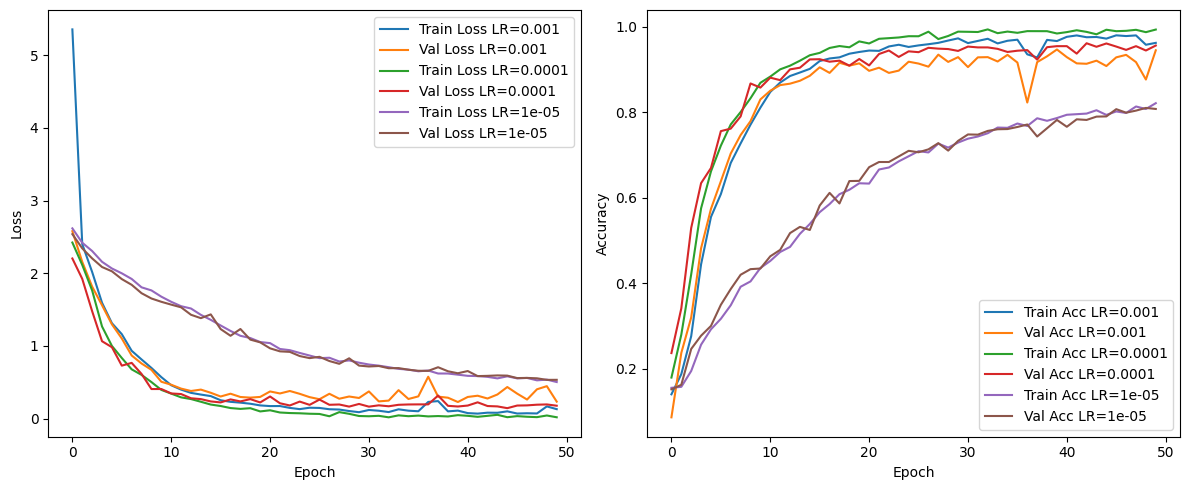

In [3]:

# Define the evaluation function
def evaluate_model(model, data_loader, criterion, device):
    model.eval()
    loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss += criterion(outputs, labels).item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    avg_loss = loss / len(data_loader)
    accuracy = correct / total
    return avg_loss, accuracy

# Define the training and evaluation function
def train_and_evaluate_model(model, train_loader, val_loader, test_loader, criterion, num_epochs, lr, device):
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []
    
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        
        for images, labels in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}', leave=False):
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()
        
        avg_train_loss = running_loss / len(train_loader)
        train_accuracy = correct_train / total_train
        
        val_loss, val_accuracy = evaluate_model(model, val_loader, criterion, device)
        
        train_losses.append(avg_train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)
        
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')
    
    test_loss, test_accuracy = evaluate_model(model, test_loader, criterion, device)
    print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')
    
    return train_losses, val_losses, train_accuracies, val_accuracies

# Define the learning rates to evaluate
learning_rates = [1e-3, 1e-4, 1e-5]

# Initialize the model and criterion
model = CustomVGG(num_classes=15).to(device)
criterion = nn.CrossEntropyLoss()

# Loop through learning rates
results = {}
for lr in learning_rates:
    print(f'\nTraining with learning rate: {lr}')
    model = CustomVGG(num_classes=15).to(device)
    train_losses, val_losses, train_accuracies, val_accuracies = train_and_evaluate_model(model, train_loader, val_loader, test_loader, criterion, num_epochs=50, lr=lr, device=device)
    results[lr] = (train_losses, val_losses, train_accuracies, val_accuracies)

# Plot the results
plt.figure(figsize=(12, 5))

for lr, (train_losses, val_losses, train_accuracies, val_accuracies) in results.items():
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label=f'Train Loss LR={lr}')
    plt.plot(val_losses, label=f'Val Loss LR={lr}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label=f'Train Acc LR={lr}')
    plt.plot(val_accuracies, label=f'Val Acc LR={lr}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

plt.tight_layout()
plt.show()